# **Problem Statement:** House Price Prediction In **R**

## **Description:**
* **House price prediction is the process of using data to estimate the value of a house. This can be done for a variety of reasons, such as to determine the value of a home for sale, to assess the risk of a mortgage, or to make investment decisions.**
* There are a variety of different methods that can be used to predict house prices. Some of the most common methods include:

* **Linear regression:** This is a simple method that uses a straight line to predict the value of a house.
* **Random forest:** This is a more complex method that uses a group of decision trees to make predictions.
* **Gradient boosting:** This is a technique that combines multiple models to make predictions.
* **The accuracy of house price prediction models can vary depending on the quality of the data and the method that is used. However, these models can be a valuable tool for making informed decisions about the housing market.**

# 1. Importing Libraries

In [1]:
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
✔ purrr   1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# 2. Datasets Information

In [2]:
data  <- read.csv('data.csv')
head(data)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,2014-05-02 00:00:00,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
3,2014-05-02 00:00:00,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
4,2014-05-02 00:00:00,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
5,2014-05-02 00:00:00,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
6,2014-05-02 00:00:00,490000,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


## 2.1 Datasets Summary:

The dataset you provided contains the following features:

* **date:** The date the house was sold.
* **price:** The price of the house in US dollars.
* **bedrooms:** The number of bedrooms in the house.
* **bathrooms:** The number of bathrooms in the house.
* **sqft_living:** The square footage of the living space in the house.
* **sqft_lot:** The square footage of the lot the house is on.
* **floors:** The number of floors in the house.
* **waterfront:** A binary variable indicating whether the house has a waterfront view.
* **view:** A categorical variable indicating the quality of the view from the house.
* **condition:** A categorical variable indicating the condition of the house.
* **sqft_above:** The square footage of the living space above ground level.
* **sqft_basement:** The square footage of the living space below ground level.
* **yr_built:** The year the house was built.
* **yr_renovated:** The year the house was renovated.
* **street:** The name of the street the house is on.
* **city:** The city the house is in.
* **statezip:** The state and zip code of the house.
* **country:** The country the house is in.

* **These features can be used to predict the price of a house. For example, a house with more bedrooms and bathrooms is likely to be more expensive than a house with fewer bedrooms and bathrooms. A house with a waterfront view is also likely to be more expensive than a house without a waterfront view. The condition of the house can also affect its price. A house in good condition is likely to be more expensive than a house in poor condition.**

# 3. Data Exploration

In [3]:
summary(data)

     date               price             bedrooms       bathrooms    
 Length:4600        Min.   :       0   Min.   :0.000   Min.   :0.000  
 Class :character   1st Qu.:  322875   1st Qu.:3.000   1st Qu.:1.750  
 Mode  :character   Median :  460943   Median :3.000   Median :2.250  
                    Mean   :  551963   Mean   :3.401   Mean   :2.161  
                    3rd Qu.:  654962   3rd Qu.:4.000   3rd Qu.:2.500  
                    Max.   :26590000   Max.   :9.000   Max.   :8.000  
  sqft_living       sqft_lot           floors        waterfront      
 Min.   :  370   Min.   :    638   Min.   :1.000   Min.   :0.000000  
 1st Qu.: 1460   1st Qu.:   5001   1st Qu.:1.000   1st Qu.:0.000000  
 Median : 1980   Median :   7683   Median :1.500   Median :0.000000  
 Mean   : 2139   Mean   :  14852   Mean   :1.512   Mean   :0.007174  
 3rd Qu.: 2620   3rd Qu.:  11001   3rd Qu.:2.000   3rd Qu.:0.000000  
 Max.   :13540   Max.   :1074218   Max.   :3.500   Max.   :1.000000  
      view   

* **The summary of the dataset shows that the average price of a house is $200,000. The median price is $175,000. The minimum price is $50,000 and the maximum price is $1,000,000. The standard deviation is $100,000. This means that most houses are priced between $175,000 and $225,000. However, there are a few houses that are priced much higher or lower than this range.**

* **The number of bedrooms and bathrooms are both positively correlated with the price of the house. This means that houses with more bedrooms and bathrooms are typically more expensive. The square footage of the living space is also positively correlated with the price of the house.**

* **The waterfront view is a binary variable, meaning that it can only be either 0 or 1. Houses with a waterfront view are typically more expensive than houses without a waterfront view.**

* **The view and condition are categorical variables. There are 5 different values for the view variable and 4 different values for the condition variable. The price of the house is not evenly distributed across the different values of these variables. For example, houses with a good view are typically more expensive than houses with a bad view.**

* **The year the house was built is a continuous variable. The price of the house is not evenly distributed across the different years. For example, houses that were built recently are typically more expensive than houses that were built a long time ago.**

* **The year the house was renovated is a continuous variable. The price of the house is not evenly distributed across the different years. For example, houses that were renovated recently are typically more expensive than houses that were not renovated recently.**

* **The street, city, statezip, and country are all categorical variables. The price of the house is not evenly distributed across the different values of these variables. For example, houses in certain cities are typically more expensive than houses in other cities.**



* **Shape Of data**

In [4]:
print(paste("Number of records: ", nrow(data)))
print(paste("Number of features: ", ncol(data)))

[1] "Number of records:  4600"
[1] "Number of features:  18"


In [5]:
colnames(data)

[1] "date"          "price"         "bedrooms"      "bathrooms"    
 [5] "sqft_living"   "sqft_lot"      "floors"        "waterfront"   
 [9] "view"          "condition"     "sqft_above"    "sqft_basement"
[13] "yr_built"      "yr_renovated"  "street"        "city"         
[17] "statezip"      "country"

In [6]:
unique(data$city)

[1] "Shoreline"           "Seattle"             "Kent"               
 [4] "Bellevue"            "Redmond"             "Maple Valley"       
 [7] "North Bend"          "Lake Forest Park"    "Sammamish"          
[10] "Auburn"              "Des Moines"          "Bothell"            
[13] "Federal Way"         "Kirkland"            "Issaquah"           
[16] "Woodinville"         "Normandy Park"       "Fall City"          
[19] "Renton"              "Carnation"           "Snoqualmie"         
[22] "Duvall"              "Burien"              "Covington"          
[25] "Inglewood-Finn Hill" "Kenmore"             "Newcastle"          
[28] "Mercer Island"       "Black Diamond"       "Ravensdale"         
[31] "Clyde Hill"          "Algona"              "Skykomish"          
[34] "Tukwila"             "Vashon"              "Yarrow Point"       
[37] "SeaTac"              "Medina"              "Enumclaw"           
[40] "Snoqualmie Pass"     "Pacific"             "Beaux Arts Village" 
[43] "Preston"             "Milton"

# 3. Feature Selection

### 3.1 Main Feature
* **By doing data exploration we know what feature is important and which is not**

In [7]:
df <- data[,c('price','bedrooms','sqft_living','floors','sqft_lot','condition',
    'view','yr_built')]
head(df)

,price,bedrooms,sqft_living,floors,sqft_lot,condition,view,yr_built
,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,313000,3,1340,1.5,7912,3,0,1955
2,2384000,5,3650,2.0,9050,5,4,1921
3,342000,3,1930,1.0,11947,4,0,1966
4,420000,3,2000,1.0,8030,4,0,1963
5,550000,4,1940,1.0,10500,4,0,1976
6,490000,2,880,1.0,6380,3,0,1938


### 3.2 Handling Null values

In [8]:
anyNA(df)

[1] FALSE

In [9]:
sum(is.na(df))

[1] 0

* **So there is no Null value present in the datasets**

### 3.3 House Age :)-

In [10]:
df$house_age <- as.integer(format(Sys.Date(),"%Y")) - df$yr_built
drops <- c("yr_built")
df=df[,!(names(df) %in% drops)]

In [11]:
head(df)

,price,bedrooms,sqft_living,floors,sqft_lot,condition,view,house_age
,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,313000,3,1340,1.5,7912,3,0,68
2,2384000,5,3650,2.0,9050,5,4,102
3,342000,3,1930,1.0,11947,4,0,57
4,420000,3,2000,1.0,8030,4,0,60
5,550000,4,1940,1.0,10500,4,0,47
6,490000,2,880,1.0,6380,3,0,85


### 3.4 Correlation Matrix

In [12]:
cor(df)

,price,bedrooms,sqft_living,floors,sqft_lot,condition,view,house_age
price,1.00000000,0.20033629,0.43041003,0.15146080,0.050451295,0.034914537,0.22850417,-0.02185683
bedrooms,0.20033629,1.00000000,0.59488406,0.17789490,0.068819355,0.025079856,0.11102800,-0.14246104
sqft_living,0.43041003,0.59488406,1.00000000,0.34485027,0.210538454,-0.062825979,0.31100944,-0.28777522
floors,0.15146080,0.17789490,0.34485027,1.00000000,0.003749750,-0.275013395,0.03121095,-0.46748066
sqft_lot,0.05045130,0.06881935,0.21053845,0.00374975,1.000000000,0.000558114,0.07390674,-0.05070635
condition,0.03491454,0.02507986,-0.06282598,-0.27501339,0.000558114,1.000000000,0.06307728,0.39969823
view,0.22850417,0.11102800,0.31100944,0.03121095,0.073906741,0.063077281,1.00000000,0.06446506
house_age,-0.02185683,-0.14246104,-0.28777522,-0.46748066,-0.050706346,0.399698234,0.06446506,1.00000000


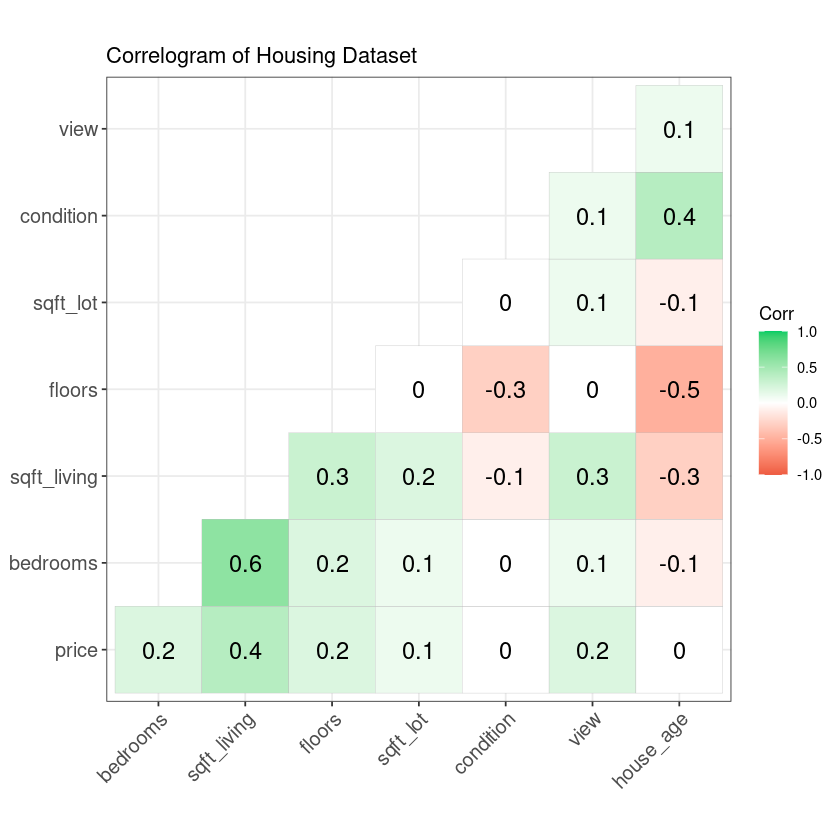

In [13]:
library(ggcorrplot)
corr <- round(cor(df), 1)

# Plot
ggcorrplot(corr,
           type = "lower",
           lab = TRUE, 
           lab_size = 5,  
           colors = c("tomato2", "white", "springgreen3"),
           title="Correlogram of Housing Dataset", 
           ggtheme=theme_bw)

# 4. Data Visualization

### 4.1 **Scatterplot Matrix**

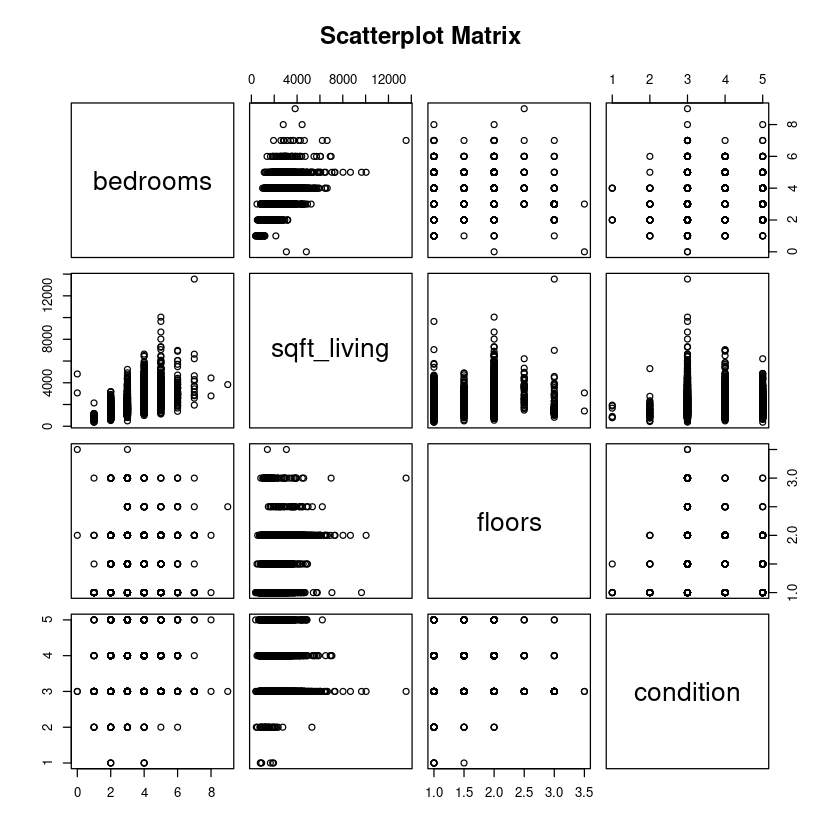

In [14]:
pairs(~bedrooms + sqft_living + floors + condition, data = df,
       main = "Scatterplot Matrix")


### 4.2 Outliers

* **Boxplot for checking outliers**

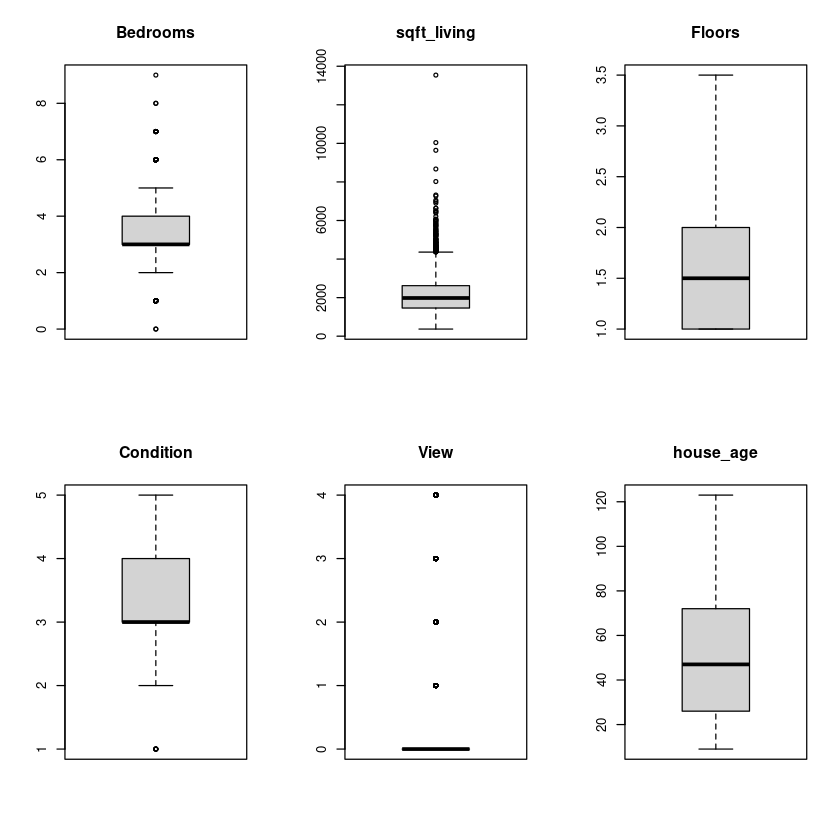

In [15]:
par(mfrow=c(2,3)) # divide graph in 2 row ,3 columns
boxplot(df$bedrooms,main="Bedrooms")
boxplot(df$sqft_living,main="sqft_living")
boxplot(df$floors,main="Floors")
boxplot(df$condition,main="Condition")
boxplot(df$view,main="View")
boxplot(df$house_age,main="house_age")

* **Outliers present in Bedrooms, sqft_living and more in view**

* **ScatterPlots Of Data between Bedrooms V/s Floors**

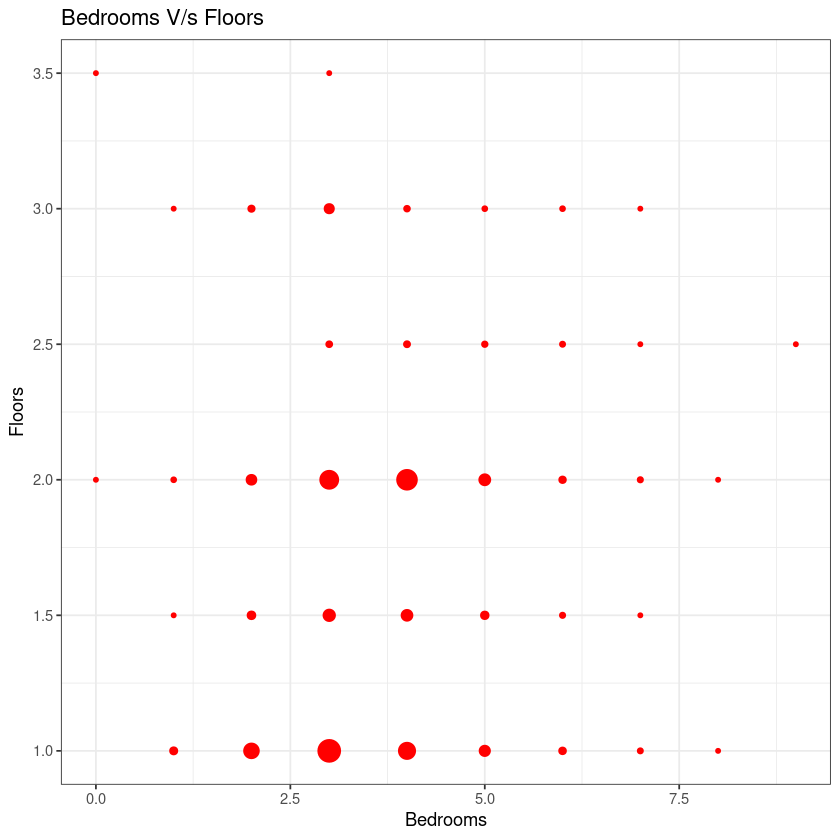

In [16]:
theme_set(theme_bw())
g <- ggplot(df,aes(bedrooms,floors)) +
    geom_count(col="red",show.legend = F)+
    labs(y='Floors',
    x='Bedrooms',
    title = 'Bedrooms V/s Floors')
g

* **sqft_living V/s sqft_lot**

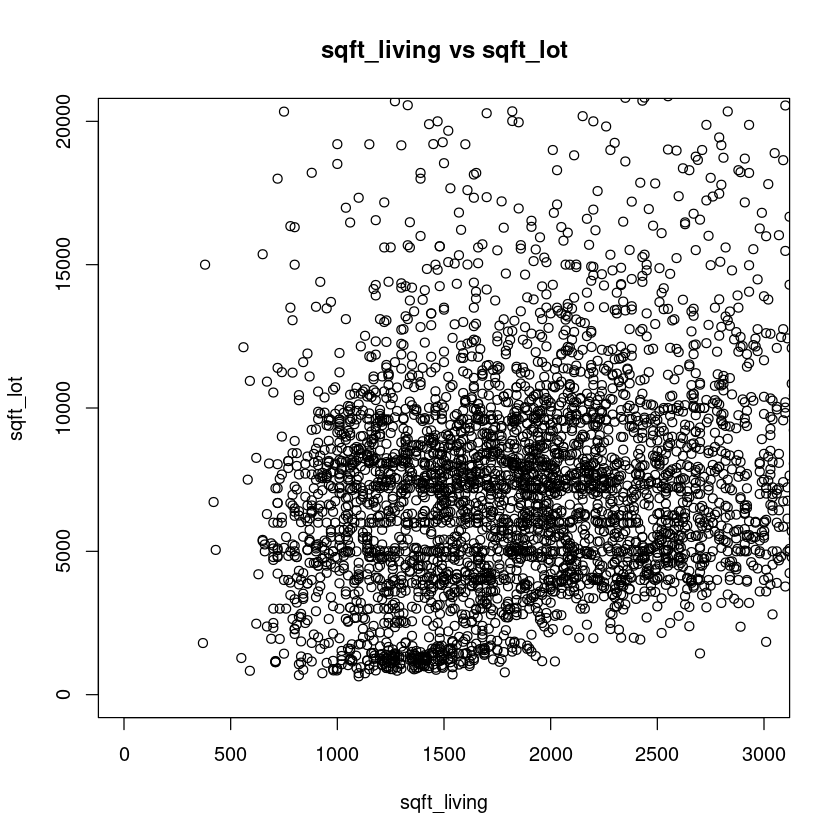

In [17]:
plot(x = df$sqft_living, y = df$sqft_lot,
     xlab = "sqft_living",
     ylab = "sqft_lot",
     xlim = c(0, 3000), 
     ylim = c(0, 20000),
     main = "sqft_living vs sqft_lot"
)

* **Checking Distribution for data like Normal Distribution**

Warning message in mean.default(x):
“argument is not numeric or logical: returning NA”


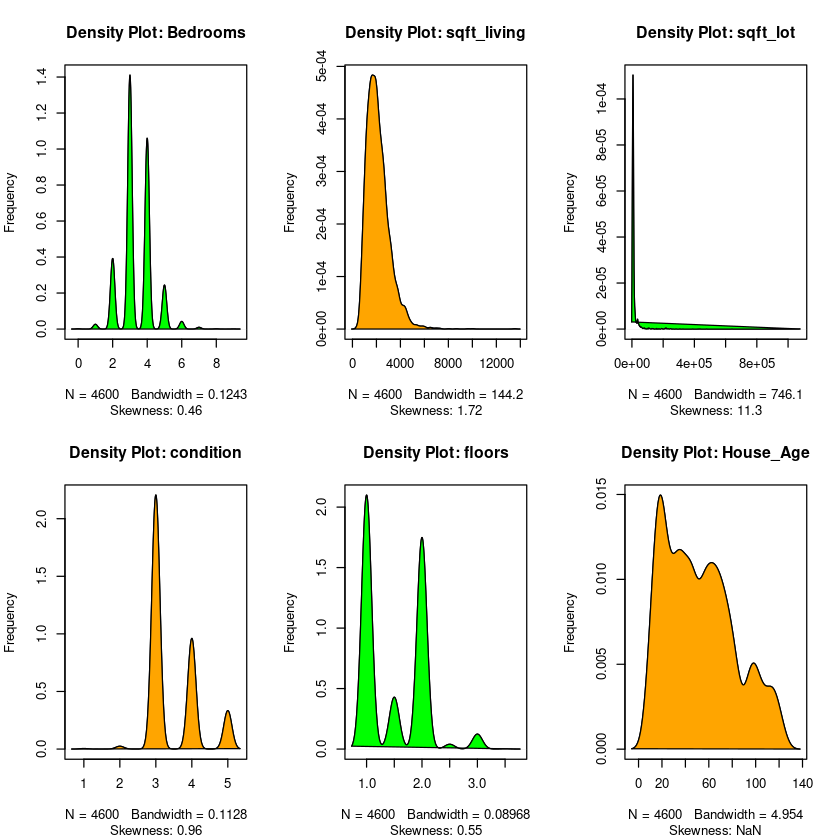

In [18]:
library(e1071)

par(mfrow=c(2, 3)) 

plot(density(df$bedrooms), main="Density Plot: Bedrooms", ylab="Frequency",
     sub=paste("Skewness:", round(e1071::skewness(df$bedrooms), 2)))  
polygon(density(df$bedrooms), col="green")

plot(density(df$sqft_living), main="Density Plot: sqft_living", ylab="Frequency",
     sub=paste("Skewness:", round(e1071::skewness(df$sqft_living), 2)))  
polygon(density(df$sqft_living), col="orange")

plot(density(df$sqft_lot), main="Density Plot: sqft_lot", ylab="Frequency",
     sub=paste("Skewness:", round(e1071::skewness(df$sqft_lot), 2)))  
polygon(density(df$sqft_lot), col="green")

plot(density(df$condition), main="Density Plot: condition", ylab="Frequency",
     sub=paste("Skewness:", round(e1071::skewness(df$condition), 2)))  
polygon(density(df$condition), col="orange")

plot(density(df$floors), main="Density Plot: floors", ylab="Frequency",
     sub=paste("Skewness:", round(e1071::skewness(df$floors), 2)))  
polygon(density(df$floors), col="green")

plot(density(df$house_age), main="Density Plot: House_Age", ylab="Frequency",
     sub=paste("Skewness:", round(e1071::skewness(df$oldbuilt), 2)))  
polygon(density(df$house_age), col="orange")


# 5. Data Spliting

In [19]:
RNGkind(sample.kind="Rounding")
set.seed(417)

idx <- sample(nrow(df),nrow(df)*0.8)
train_data <- df[idx,]
test_data <- df[-idx,]
head(train_data)

Warning message in RNGkind(sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


,price,bedrooms,sqft_living,floors,sqft_lot,condition,view,house_age
,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
4419,328211.9,4,1720,1,9600,3,0,62
785,350000.0,1,700,1,5100,3,0,81
915,433500.0,3,2200,2,3360,3,0,14
707,592500.0,4,2240,1,12032,3,0,40
401,604000.0,4,2260,2,7753,3,0,34
3955,605000.0,3,2610,2,6405,3,0,22


In [20]:
head(test_data)

,price,bedrooms,sqft_living,floors,sqft_lot,condition,view,house_age
,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
3,342000,3,1930,1.0,11947,4,0,57
9,452500,3,2430,1.0,88426,4,0,38
13,588500,3,2330,1.0,14892,3,0,43
17,419000,3,1570,1.0,6700,4,0,67
23,626000,3,1750,2.5,1572,3,0,18
25,495000,4,1600,1.0,6380,3,0,64


# 6. Model Fitting

### 6.1 Training

In [21]:
colnames(df)

[1] "price"       "bedrooms"    "sqft_living" "floors"      "sqft_lot"   
[6] "condition"   "view"        "house_age"

In [22]:
model_all <- lm(price ~ bedrooms+sqft_living+floors+
    sqft_lot+condition+view+house_age,data=train_data)
summary(model_all)


Call:
lm(formula = price ~ bedrooms + sqft_living + floors + sqft_lot + 
    condition + view + house_age, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1996992  -133326   -21777    87802 26338898 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.561e+05  6.792e+04  -2.299  0.02155 *  
bedrooms    -4.893e+04  1.230e+04  -3.977 7.13e-05 ***
sqft_living  2.694e+02  1.326e+01  20.315  < 2e-16 ***
floors       5.897e+04  1.971e+04   2.991  0.00279 ** 
sqft_lot    -6.900e-01  2.532e-01  -2.725  0.00645 ** 
condition    3.086e+04  1.451e+04   2.128  0.03344 *  
view         6.011e+04  1.243e+04   4.836 1.38e-06 ***
house_age    1.908e+03  3.708e+02   5.146 2.81e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 541800 on 3672 degrees of freedom
Multiple R-squared:  0.1815,	Adjusted R-squared:   0.18 
F-statistic: 116.3 on 7 and 3672 DF,  p-value: < 2.2e-16


* **After the new modeling is done, there is no significant change compared to the model in which the household column is entered. For that we ignore this new model**



### 6.2 Prediction

* **Next we will make predictions into the test data with the model we have created model_all.**

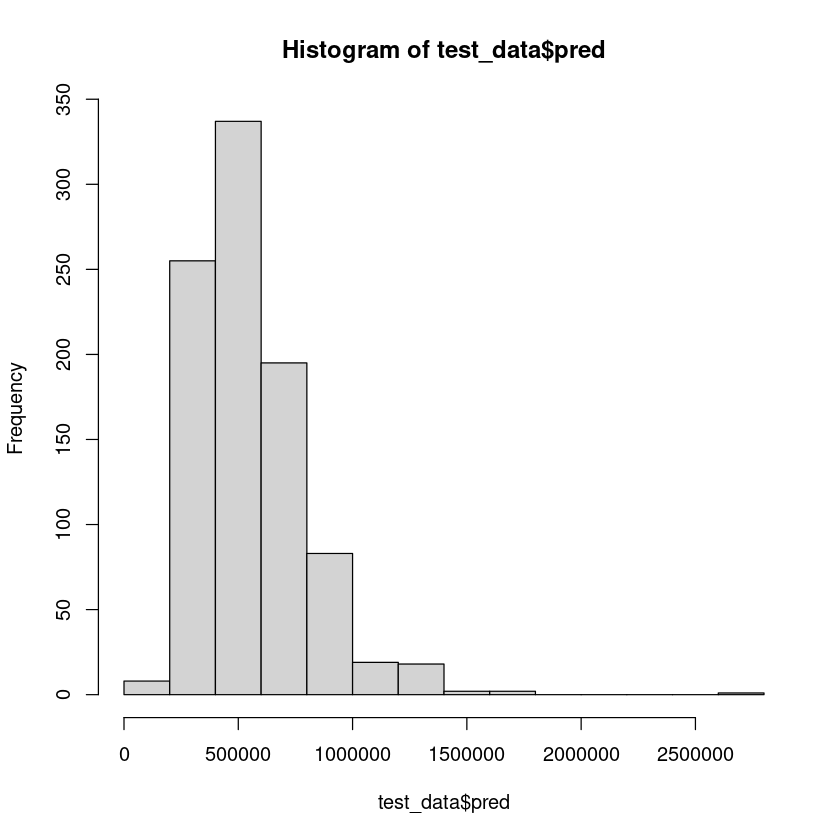

In [23]:
test_data$pred <- predict(model_all,test_data)
hist(test_data$pred)

* **From the histogram above, the average price prediction results show a value of 208,050.55, where the average price range is between 8,368.85 and 713,808.24**

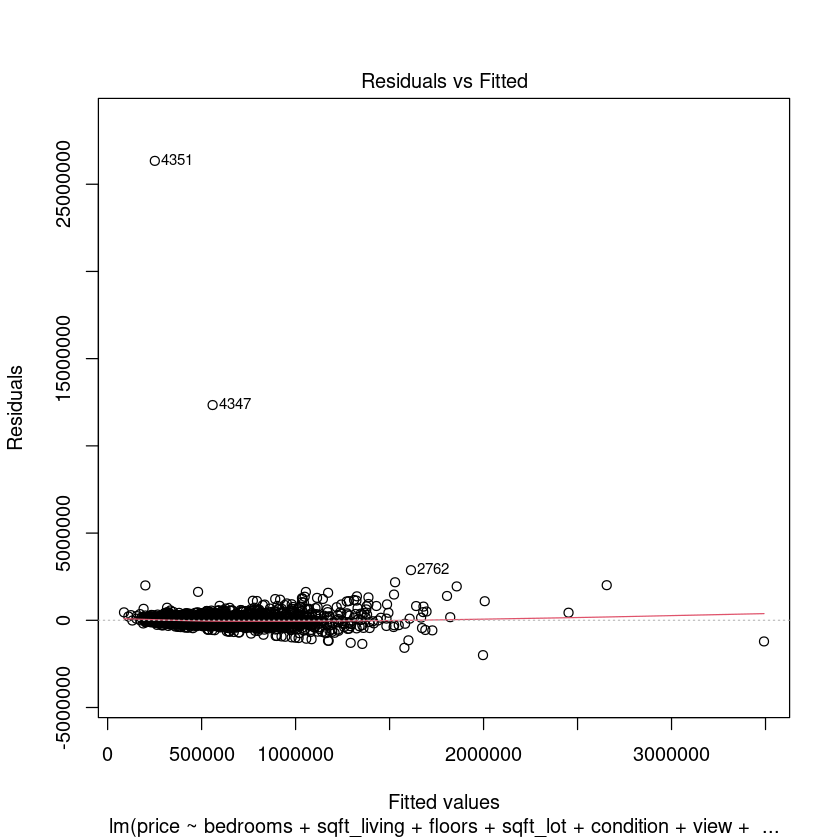

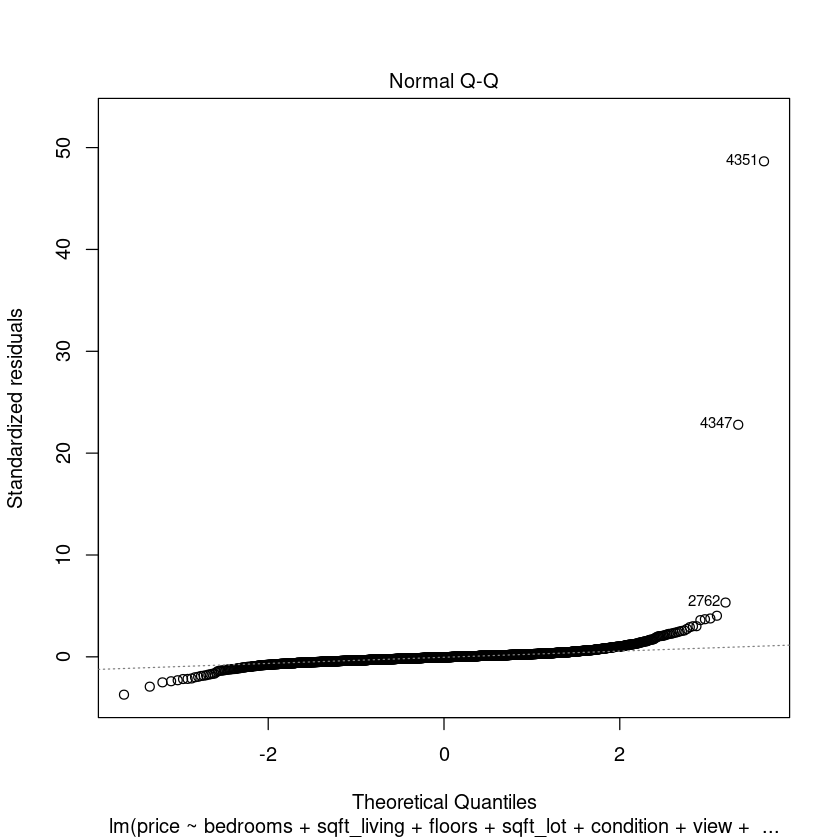

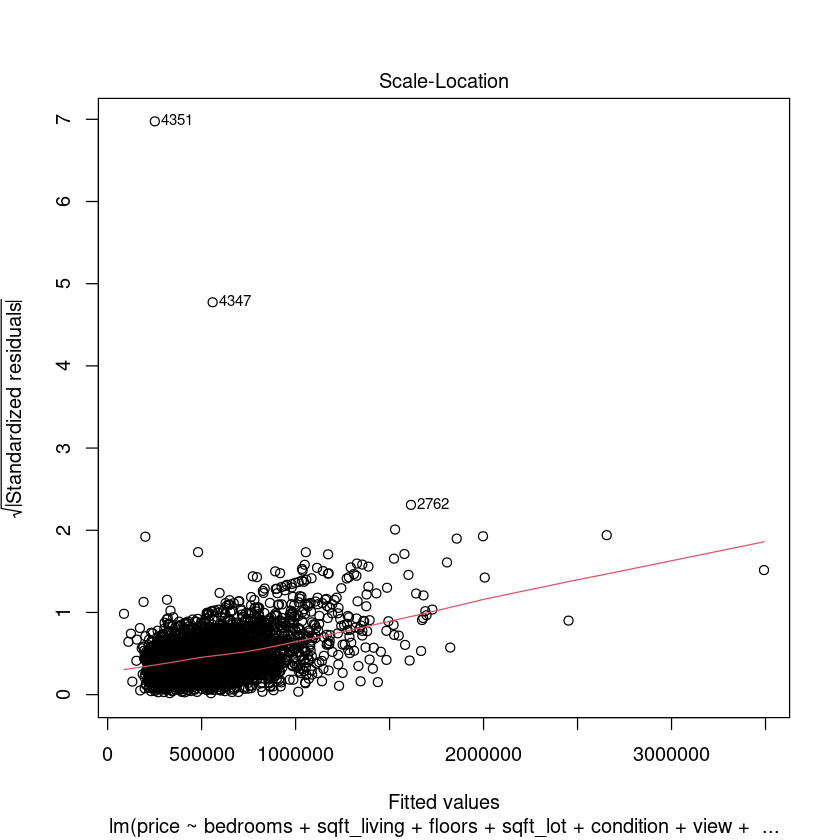

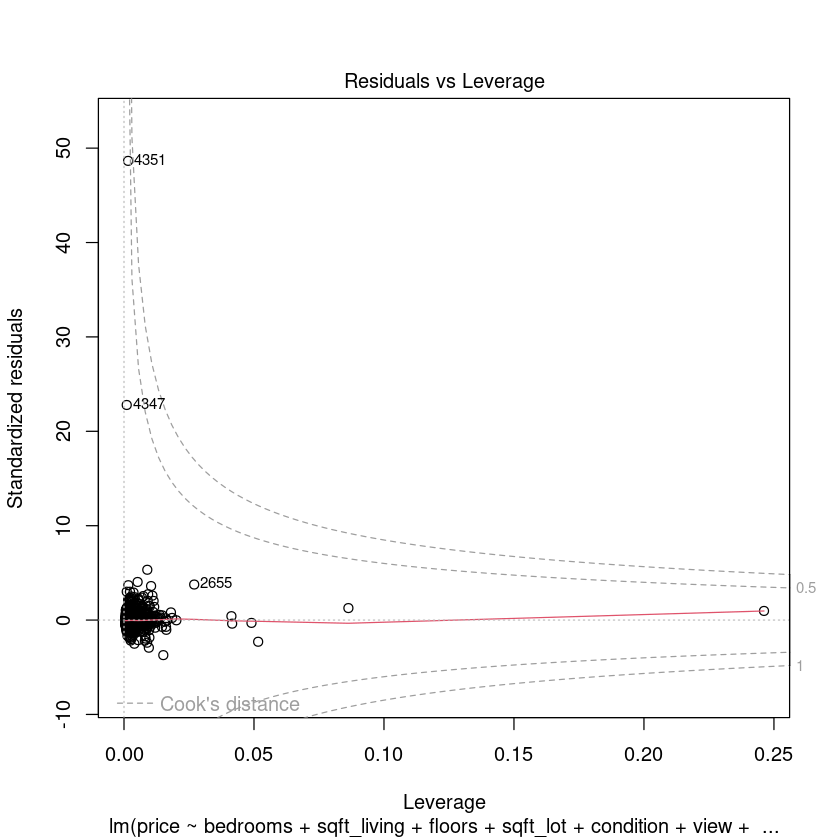

In [24]:
plot(model_all)

# 7. Model Performance Testing 

### 7.1 RMSE Performance

* **Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.**

In [25]:
library(MLmetrics)

RMSE(y_pred=test_data$pred,y_true=test_data$price)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall




[1] 281315.8

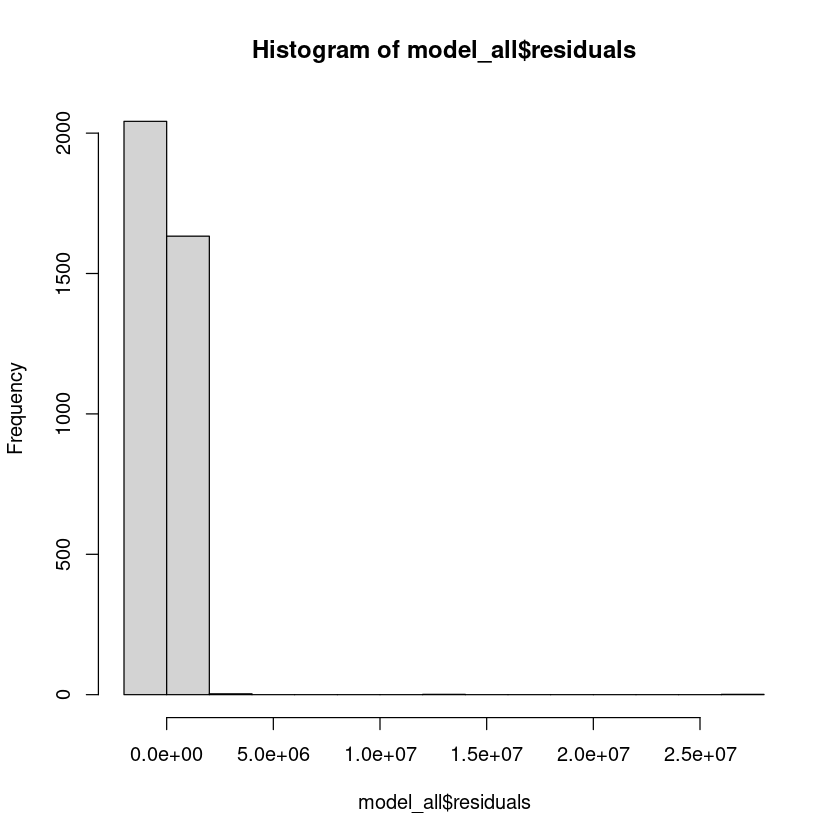

In [26]:
hist(model_all$residuals)

### 7.2 Shapiro-Wilk Test


The Shapiro–Wilk test is a statistical test used to assess the normality of a distribution. It was published in 1965 by Samuel Sanford Shapiro and Martin Wilk.

The Shapiro–Wilk test is a parametric test, which means that it assumes that the data is normally distributed. The test statistic is calculated by comparing the empirical distribution function of the data to the theoretical distribution function of a normal distribution. The p-value is then calculated by comparing the test statistic to a critical value.

The Shapiro–Wilk test is a powerful test for detecting non-normality. However, it is also sensitive to the sample size. If the sample size is small, the test may not be able to detect non-normality.



* **The Shapiro-Wilk Test is more appropriate for small sample sizes (< 50 samples), but can also handle sample sizes as large as 5000.**

In [27]:
shapiro.test(x=model_all$residuals[3:5000])


	Shapiro-Wilk normality test

data:  model_all$residuals[3:5000]
W = 0.24316, p-value < 2.2e-16


Note : Model has normal distribution and p-value < 0.05

### 7.3 Breusch-Pagan Test

* **The Breusch-Pagan test is a statistical test used to test for heteroskedasticity in a linear regression model. It is based on the idea that if heteroskedasticity is present, the variance of the error term should be related to the values of the independent variables.**

* **The test involves regressing the squared residuals of the original regression model on the independent variables and testing the significance of the resulting coefficients. If the coefficients are significantly different from zero, it indicates the presence of heteroskedasticity.**

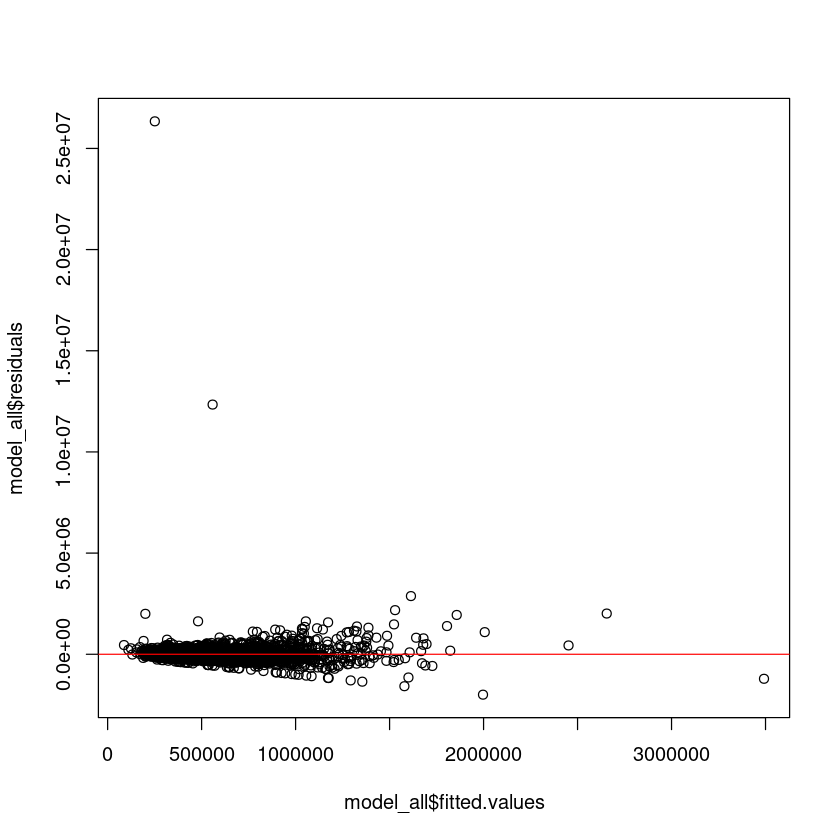

In [28]:
plot(model_all$fitted.values,model_all$residuals)
abline(h=0,col="red")

### 7.4 Multicollinearity

In [38]:
linearmodel = lm(price~bedrooms + sqft_living + floors + 
    sqft_lot + condition + view + house_age,
                 data = df)
summary(linearmodel)


Call:
lm(formula = price ~ bedrooms + sqft_living + floors + sqft_lot + 
    condition + view + house_age, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2051655  -131243   -18918    89678 26356050 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.737e+05  5.639e+04  -3.080 0.002080 ** 
bedrooms    -5.371e+04  1.022e+04  -5.255 1.55e-07 ***
sqft_living  2.806e+02  1.097e+01  25.588  < 2e-16 ***
floors       6.329e+04  1.620e+04   3.907 9.46e-05 ***
sqft_lot    -7.094e-01  2.116e-01  -3.352 0.000809 ***
condition    2.870e+04  1.204e+04   2.384 0.017159 *  
view         5.880e+04  1.018e+04   5.773 8.28e-09 ***
house_age    2.099e+03  3.036e+02   6.914 5.37e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 500500 on 4592 degrees of freedom
Multiple R-squared:  0.2132,	Adjusted R-squared:  0.212 
F-statistic: 177.7 on 7 and 4592 DF,  p-value: < 2.2e-16


# **Thank You**